<a href="https://colab.research.google.com/github/Erfan-Mostafiz/Mental-Health-of-students-after-reopening-of-education-institutes/blob/main/Experiment%20Dataset/CSE498R_Predicting_Anxiety_Depression_in_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing / Installing packages

In [1]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from numpy.random import randn
from statistics import stdev
from warnings import simplefilter #Filtering warnings

In [2]:
dataset = '/content/Final-DATASETLast_Modify-Sheet1.csv'

In [3]:
df1 = pd.read_csv(dataset)

In [4]:
df1.head()

,Your Age,Your Gender,Name of your Educational Institution,Institution Type,District where you stayed when education institutions were closed for Covid19,Location of your household where you stayed when education institutions were closed for Covid19,What is your Family Income Status?,Number of bedrooms in your house?,Do you have a separate bedroom?,Were you ever infected by Covid19?,...,"Feeling afraid, as if something awful might happen",Little Interest or Pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble Falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or you have let your family down,"Trouble concentrating on things, such as reading, watching tv or videos, studying",Moving or speaking so slowly that other people could have noticed it. Or the opposite being so restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself"
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [12]:
df1["Your Age"].unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
df1.columns

Index(['Your Age', 'Your Gender', 'Name of your Educational Institution',
       'Institution Type',
       'District where you stayed when education institutions were closed for Covid19',
       'Location of your household where you stayed when education institutions were closed for Covid19',
       'What is your Family Income Status?',
       'Number of bedrooms in your house?', 'Do you have a separate bedroom?',
       'Were you ever infected by Covid19?',
       'Has anyone in your family ever been infected by Covid19?  ',
       'If you or your family had been ever infected by Covid19, how much did it affect your mental health during that time? ',
       'Had any of your family members (including yourself) lost their job or business due to Covid19?',
       'With all the deaths due to Covid19 around us in general, how much did it affect your mental health?',
       'Are you a smoker?', 'Do you have any underlying medical condition? ',
       'Do any of your family members have any

In [ ]:
df1.nunique()

Your Age                                                                                                                                                          14
Your Gender                                                                                                                                                        2
Name of your Educational Institution                                                                                                                              30
Institution Type                                                                                                                                                   3
District where you stayed when education institutions were closed for Covid19                                                                                     26
Location of your household where you stayed when education institutions were closed for Covid19                                                                    4
What is yo

## Exploratory Data Analysis And Data Preprocessing 

In [ ]:
df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.replace(',','_')
df1.columns = df1.columns.str.replace('.','_')
df1.columns = df1.columns.str.replace('-','_')
df1.columns = df1.columns.str.replace(' -','_')
df1.columns = df1.columns.str.replace(' - ','_')
df1.columns = df1.columns.str.replace('- ','_')
df1.columns = df1.columns.str.replace('\n','_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2 = df1
df2.isnull().any()

Your_Age                                                                                                                                                          False
Your_Gender                                                                                                                                                       False
Name_of_your_Educational_Institution                                                                                                                              False
Institution_Type                                                                                                                                                  False
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     False
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                 

In [ ]:
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2 = df2.dropna(how='any',axis=0) 
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2.shape
df2.head(20)

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
5,17,Male,"Sonapur College, Maijdee,Noakhali",College,Noakhali,Semi-Urban,Middle class,2 bedrooms,Maybe,No,...,Several Days,Nearly every day,Not at all,Nearly every day,Several Days,Several Days,Several Days,Nearly every day,Not at all,Nearly every day
6,17,Female,Noakhali Government college,College,Noakhali,Upazila,Middle class,3 bedrooms,No,Maybe,...,Not at all,More than half the days,Several Days,Nearly every day,Nearly every day,More than half the days,More than half the days,Nearly every day,Not at all,Not at all
7,17,Male,Noakhali Govt. College,College,Noakhali,Rural,Middle class,2 bedrooms,Yes,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
8,17,Male,Scholar's School and College,College,Noakhali,Rural,Lower-Middle,2 bedrooms,No,No,...,More than half the days,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Several Days,Several Days,Nearly every day
9,17,Female,Noakhali Government college,College,Noakhali,Upazila,Upper-Middle class,3 bedrooms,No,No,...,Several Days,Several Days,Several Days,Several Days,Not at all,Not at all,Several Days,Several Days,Not at all,Not at all


### Checking for data consistency

In [ ]:
df2.nunique()

Your_Age                                                                                                                                                          14
Your_Gender                                                                                                                                                        2
Name_of_your_Educational_Institution                                                                                                                              30
Institution_Type                                                                                                                                                   3
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     26
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                    4
What_is_yo

In [ ]:
df2.Name_of_your_Educational_Institution.unique()

array(['Viqarunnisa Noon School And College',
       'Motijheel Govt Girls High School ',
       'Birshreshtha Munshi Abdur Rouf Public College',
       "Scholar's School and College", 'Noakhali Government college ',
       'Sonapur College, Maijdee,Noakhali ', 'Noakhali Govt. College ',
       'Chowmuhani Government SA College ',
       'Noakhali Govt. Women College', 'Maijdee Public College ',
       'BAF Shaheen College Dhaka', "Noakhali Govt  Women's  College ",
       'North south university', 'Dhaka University ',
       'Birshrestha Noor Mohammad Rifles Public College ',
       'Dhaka City College', "Noakhali womens' college ",
       'Rajshahi University of Engineering & Technology',
       'Noakhali Science and Technology University ',
       'Bangladesh University of Business and Technology',
       'University of Dhaka ',
       'Military Institute of Science and Technology',
       'Jagannath University', 'Daffodil International University   ',
       'University of Asia Pac

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2.Institution_Type.unique()

array(['School ', 'College ', 'University'], dtype=object)

In [ ]:
df2.District_where_you_stayed_when_education_institutions_were_closed_for_Covid19.unique()

array(['Dhaka', 'Noakhali', 'Comilla', 'Dhaka Metropolitan Area',
       'Tangail ', 'Chattogram ', 'Narayanganj ', 'Barishal', 'Dinajpur ',
       'Dinajpur', 'Jhenaidah ', 'Sonargaon, Narayanganj,', 'Gazipur',
       'Jashore ', 'Jamalpur', 'Chuadanga', 'Mymensingh', 'Jashore',
       'Gazipur ', 'Natore', 'Gaibandha', 'Homw Town ', 'Mymensingh ',
       'Feni', 'Sirajganj', 'Rajshahi '], dtype=object)

### Data Preprocessing

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Gender'].value_counts()

Male      114
Female     69
Name: Your_Gender, dtype: int64

In [ ]:
df2['Name_of_your_Educational_Institution'].value_counts()

North south university                                  120
Noakhali Govt. College                                   15
Noakhali Government college                              14
Rajshahi University of Engineering & Technology           4
Scholar's School and College                              4
Chowmuhani Government SA College                          2
Daffodil International University                         1
Bangladesh University of Business and Technology          1
University of Dhaka                                       1
Military Institute of Science and Technology              1
Jagannath University                                      1
Viqarunnisa Noon School And College                       1
University of Asia Pacific                                1
Noakhali Science and Technology University                1
University of Dhaka                                       1
Dhaka                                                     1
American International University Bangla

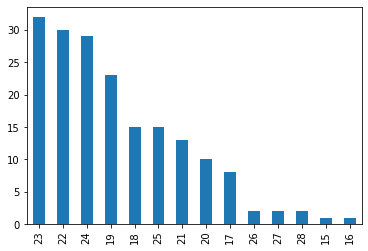

In [ ]:
df2['Your_Age'].value_counts().plot.bar()

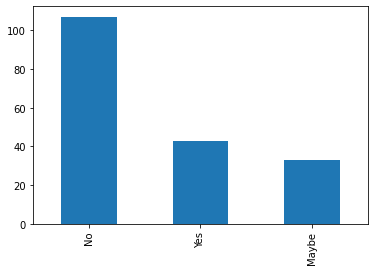

In [ ]:
df2['Were_you_ever_infected_by_Covid19?'].value_counts().plot.bar()

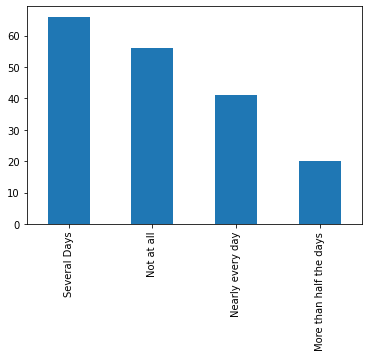

In [ ]:
df2['Feeling_afraid__as_if_something_awful_might_happen'].value_counts().plot.bar()

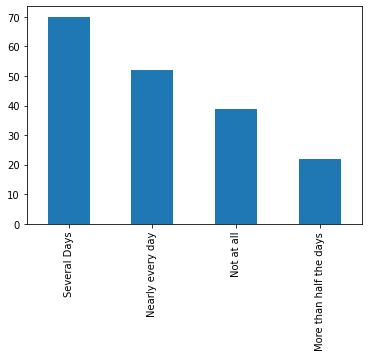

In [ ]:
df2['Feeling_down__depressed__or_hopeless'].value_counts().plot.bar()

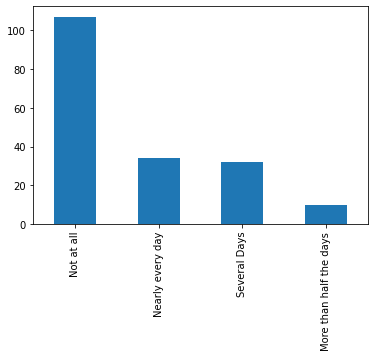

In [ ]:
df2['Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself'].value_counts().plot.bar()

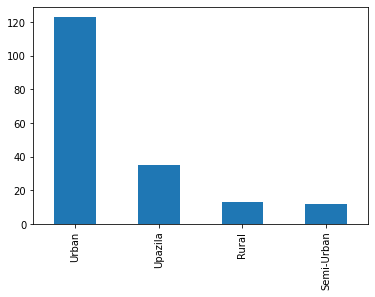

In [ ]:
df2['Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19'].value_counts().plot.bar()

# **Creating Separate List For making Depression Column**

In [ ]:
df2.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
#1.for Little_Interest_or_Pleasure_in_doing_things column
little = []

tempLittle = df2.Little_Interest_or_Pleasure_in_doing_things.values.tolist()

for i in tempLittle:
  if i == 'Not at all':
    little.append(int(0))
  elif i == 'Several Days':
    little.append(int(1))
  elif i == 'More than half the days':
    little.append(int(2))
  else:
    little.append(int(3))


#2.Feeling_down__depressed__or_hopeless
FeelingDep = []
tempFD = df2.Feeling_down__depressed__or_hopeless.values.tolist()

for i in tempFD:
  if i == 'Not at all':
    FeelingDep.append(int(0))
  elif i == 'Several Days':
    FeelingDep.append(int(1))
  elif i == 'More than half the days':
    FeelingDep.append(int(2))
  else:
    FeelingDep.append(int(3))


#3.Trouble falling or staying asleep, or sleeping too much
tfs = []
tempTfs = df2.Trouble_Falling_or_staying_asleep__or_sleeping_too_much.values.tolist()
for i in tempTfs:
  if i == 'Not at all':
    tfs.append(int(0))
  elif i == 'Several Days':
    tfs.append(int(1))
  elif i == 'More than half the days':
    tfs.append(int(2))
  else:
    tfs.append(int(3))

#4.Feeling tired or having little energy
fte = []
tempfte = df2.Feeling_tired_or_having_little_energy_.values.tolist()
for i in tempfte:
  if i == 'Not at all':
    fte.append(int(0))
  elif i == 'Several Days':
    fte.append(int(1))
  elif i == 'More than half the days':
    fte.append(int(2))
  else:
    fte.append(int(3))

#5.Poor appetite or overeating
pao = []
temppao = df2.Poor_appetite_or_overeating.values.tolist()
for i in temppao:
  if i == 'Not at all':
    pao.append(int(0))
  elif i == 'Several Days':
    pao.append(int(1))
  elif i == 'More than half the days':
    pao.append(int(2))
  else:
    pao.append(int(3))

#6.Feeling bad about yourself or that you are a failure or have let yourself or your family down
fba = []
tempfba = df2.Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down.values.tolist()
for i in tempfba:
  if i == 'Not at all':
    fba.append(int(0))
  elif i == 'Several Days':
    fba.append(int(1))
  elif i == 'More than half the days':
    fba.append(int(2))
  else:
    fba.append(int(3))

#7.Trouble concentrating on things, such as reading the newspaper or watching television
tct = []
temptct = df2.Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying.values.tolist()
for i in temptct:
  if i == 'Not at all':
    tct.append(int(0))
  elif i == 'Several Days':
    tct.append(int(1))
  elif i == 'More than half the days':
    tct.append(int(2))
  else:
    tct.append(int(3))

# print(tct)
# print(temptct)

#8.Moving or speaking so slowly that other people could
# have noticed. Or the opposite being so figety or
# restless that you have been moving around a lot more
# than usual
msp = []
tempmsp = df2.Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual.values.tolist()
for i in tempmsp:
  if i == 'Not at all':
    msp.append(int(0))
  elif i == 'Several Days':
    msp.append(int(1))
  elif i == 'More than half the days':
    msp.append(int(2))
  else:
    msp.append(int(3))

# 9.Thoughts that you would be better off dead, or of
# hurting yourself

tyd = []
temptyd = df2.Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself.values.tolist()
for i in temptyd:
  if i == 'Not at all':
    tyd.append(int(0))
  elif i == 'Several Days':
    tyd.append(int(1))
  elif i == 'More than half the days':
    tyd.append(int(2))
  else:
    tyd.append(int(3))


# **Making Depression column This is formatted as code using PHQ-9**

In [ ]:
# 1 --> little
# 2--> FeelingDep
# 3--> tfs
# 4-->fte
# 5--->pao
# 6--->fba
#7-->tct
# 8--->msp
# 9-->tyd

# 1-4 Minimal depression 
# 5-9 Mild depression
# 10-14 Moderate depressi
# 15-19 Moderately severe depression
# 20-27 Severe depression 


depression_level = []
for i in range(183):
  val = little[i] + FeelingDep[i] + tfs[i] + fte[i] + pao[i] + fba[i] + msp[i] + tyd[i] + tct[i]
  if(val >= 1 and val <= 4):
    depression_level.append('Minimal depression')
  elif(val >= 5 and val <= 9):
    depression_level.append('Mild depression')
  elif(val >= 10 and val <= 14):
    depression_level.append('Moderate depressi')
  elif(val >= 15 and val <= 19):
    depression_level.append('Moderately severe depression')
  else:
    depression_level.append('Severe depression')
df2 = df2.assign(depression_level = depression_level)
df2.head()


,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression


# **Making Separate List for Anxiety Column**

In [ ]:
# 1. Feeling nervous, anxious, or on edge
fnv = []
tempfnv = df2.Feeling_nervous__anxious__or_on_the_edge__.values.tolist()

for i in tempfnv:
  if i == 'Not at all':
    fnv.append(int(0))
  elif i == 'Several Days':
    fnv.append(int(1))
  elif i == 'More than half the days':
    fnv.append(int(2))
  else:
    fnv.append(int(3))
# 2. Not being able to stop or control worrying
nbw = []
tempnbw = df2.Not_being_able_to_stop_or_control_worrying.values.tolist()
for i in tempnbw:
  if i == 'Not at all':
    nbw.append(int(0))
  elif i == 'Several Days':
    nbw.append(int(1))
  elif i == 'More than half the days':
    nbw.append(int(2))
  else:
    nbw.append(int(3))
# 3. Worrying too much about different things
wtm = []
tempwtm = df2.Worrying_too_much_about_different_things.values.tolist()
for i in tempwtm:
  if i == 'Not at all':
    wtm.append(int(0))
  elif i == 'Several Days':
    wtm.append(int(1))
  elif i == 'More than half the days':
    wtm.append(int(2))
  else:
    wtm.append(int(3))
# 4. Trouble relaxing
tr = []
temptr = df2.Trouble_relaxing.values.tolist()
for i in temptr:
  if i == 'Not at all':
    tr.append(int(0))
  elif i == 'Several Days':
    tr.append(int(1))
  elif i == 'More than half the days':
    tr.append(int(2))
  else:
    tr.append(int(3))
# 5. Being so restless that it is hard to sit still
bss = []
tempbss = df2.Being_so_restless_that_it_is_hard_to_sit_still.values.tolist()
for i in tempbss:
  if i == 'Not at all':
    bss.append(int(0))
  elif i == 'Several Days':
    bss.append(int(1))
  elif i == 'More than half the days':
    bss.append(int(2))
  else:
    bss.append(int(3))
# 6. Becoming easily annoyed or irritable
bei = []
tempbei = df2.Becoming_easily_annoyed_or_irritable.values.tolist()
for i in tempbei:
  if i == 'Not at all':
    bei.append(int(0))
  elif i == 'Several Days':
    bei.append(int(1))
  elif i == 'More than half the days':
    bei.append(int(2))
  else:
    bei.append(int(3))
# 7. Feeling afraid, as if something awful
# might happen
fah = []
tempfah = df2.Feeling_afraid__as_if_something_awful_might_happen.values.tolist()
for i in tempfah:
  if i == 'Not at all':
    fah.append(int(0))
  elif i == 'Several Days':
    fah.append(int(1))
  elif i == 'More than half the days':
    fah.append(int(2))
  else:
    fah.append(int(3))


# **Making Anxiety Column using GAD-7**

In [ ]:
# fnv
# nbw
# wtm
# tr
# bss
# bei
# fah

# 0–4: minimal anxiety
# 5–9: mild anxiety
# 10–14: moderate anxiety
# 15–21: severe anxiety  

Anxiety_level = []
for i in range(183):
  val = fnv[i] + nbw[i] + wtm[i] + tr[i] + bss[i] + bei[i] + fah[i]
  if(val >= 1 and val <= 4):
    Anxiety_level.append('Minimal anxiety')
  elif(val >= 5 and val <= 9):
    Anxiety_level.append('Mild anxiety')
  elif(val >= 10 and val <= 14):
    Anxiety_level.append('Moderate anxiety')
  else:
    Anxiety_level.append('Severe anxiety')

print(Anxiety_level)
df2 = df2.assign(Anxiety_level = Anxiety_level)
df2.head()


['Minimal anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety', 'Severe anxiety', 'Minimal anxiety', 'Mild anxiety', 'Minimal anxiety', 'Minimal anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Minimal anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety'

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety


# **Dropping Unnecessary Column**

In [ ]:
df_temp = df2.copy()
#drop column, those are related with depression level
df_final = df_temp.drop(["Little_Interest_or_Pleasure_in_doing_things",
                         "Feeling_down__depressed__or_hopeless",
                         "Trouble_Falling_or_staying_asleep__or_sleeping_too_much",
                         "Feeling_tired_or_having_little_energy_",
                         "Poor_appetite_or_overeating",
                         "Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down",
                         "Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying",
                         "Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual", 
                        "Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself"], axis = 1)

#drop column, those are related with anxiety level
df_final = df_final.drop(["Feeling_nervous__anxious__or_on_the_edge__",
                         "Not_being_able_to_stop_or_control_worrying",
                         "Worrying_too_much_about_different_things",
                         "Trouble_relaxing",
                         "Being_so_restless_that_it_is_hard_to_sit_still",
                         "Becoming_easily_annoyed_or_irritable",
                         "Feeling_afraid__as_if_something_awful_might_happen"],
                         axis = 1)

df_final.shape


(183, 36)

In [ ]:
df_final.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


# **Label Encodding Scalling**

In [ ]:
df_final.head()
lbl_encode = df_final.copy()

In [ ]:
lb_make = LabelEncoder()

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


In [ ]:
for column in df_final:
  if column == 'Your_Age':
    continue
  lbl_encode[column] = lb_make.fit_transform(df_final[column])

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,16,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,17,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,17,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,17,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
scale_vars = ['Your_Age']
scaler = MinMaxScaler()
lbl_encode[scale_vars] = scaler.fit_transform(lbl_encode[scale_vars])
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,0.000000,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,0.076923,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,0.153846,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,0.153846,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,0.153846,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


# **Predict Depression**




In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
lbl_encode.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
lbl_encode_depression = lbl_encode.copy()

In [ ]:
 lbl_encode_depression = lbl_encode_depression.drop(columns = 'Anxiety_level')
y = lbl_encode_depression['depression_level']
X = lbl_encode_depression.drop(columns = 'depression_level')


In [ ]:
X.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
0,15,0,29,1,4,3,2,2,2,1,...,0,0,2,2,2,2,0,0,0,2
1,16,0,14,1,4,3,2,1,1,1,...,0,3,3,3,3,3,1,1,3,1
2,17,1,4,0,4,3,4,1,2,1,...,3,2,0,0,1,1,1,1,2,3
3,17,1,24,0,4,3,5,2,2,0,...,1,3,2,1,0,0,0,0,1,1
4,17,1,15,0,21,2,2,3,2,1,...,2,1,0,2,0,1,0,0,3,1


In [ ]:
y.value_counts()

0    47
4    46
3    35
2    28
1    27
Name: depression_level, dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
100,22,1,22,2,4,3,2,3,2,1,...,2,2,2,3,0,3,0,0,3,0
88,22,1,22,2,3,0,2,2,2,1,...,2,2,0,0,2,2,0,0,1,0
77,22,0,22,2,4,3,5,2,2,1,...,2,3,2,2,3,3,0,1,2,3
163,25,1,22,2,3,3,2,1,0,2,...,3,3,2,3,1,2,0,0,2,0
178,26,1,22,2,19,1,5,3,2,0,...,0,3,2,0,1,1,0,0,0,0


In [ ]:
corr = X_train.corr()
corr

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
Your_Age,1.000000,0.278493,0.440687,0.757838,-0.346397,0.162499,0.027791,0.157836,0.189270,-0.007887,...,-0.201203,0.367135,0.132752,0.026077,0.007155,0.089874,0.043923,-0.064692,-0.022403,-0.226723
Your_Gender,0.278493,1.000000,0.001262,0.209517,-0.192708,0.045012,-0.105912,0.019371,0.247941,-0.216318,...,0.029326,0.113220,-0.041863,-0.103749,-0.122285,0.093195,-0.053257,-0.073350,-0.044966,-0.126205
Name_of_your_Educational_Institution,0.440687,0.001262,1.000000,0.611130,-0.304495,0.089092,0.096003,0.167553,0.232129,0.116813,...,-0.264479,0.209900,0.192636,0.069548,0.161369,0.167883,0.091150,-0.038752,0.005512,-0.012872
Institution_Type,0.757838,0.209517,0.611130,1.000000,-0.527438,0.181878,0.019234,0.222754,0.305281,0.093657,...,-0.221170,0.312999,0.135801,0.059215,-0.002276,0.101899,0.110371,-0.074622,0.082498,-0.134130
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,-0.346397,-0.192708,-0.304495,-0.527438,1.000000,-0.454435,-0.144593,-0.082450,-0.293767,-0.056624,...,0.161983,-0.315910,-0.021118,-0.057733,0.039879,-0.130479,-0.050203,-0.011869,0.035913,0.053956
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,0.162499,0.045012,0.089092,0.181878,-0.454435,1.000000,0.113678,-0.077850,0.161188,0.007358,...,-0.120372,0.213913,0.132173,0.195469,-0.045154,0.038806,0.069950,0.080237,0.062621,-0.021570
What_is_your_Family_Income_Status?,0.027791,-0.105912,0.096003,0.019234,-0.144593,0.113678,1.000000,0.292708,0.170016,-0.015078,...,0.047724,-0.007392,-0.007106,0.004606,-0.098789,0.010339,0.031809,0.036715,-0.047950,-0.003325
Number_of_bedrooms_in_your_house?,0.157836,0.019371,0.167553,0.222754,-0.082450,-0.077850,0.292708,1.000000,0.325210,0.019130,...,-0.134759,-0.071601,0.088392,0.186099,-0.136743,-0.027079,0.020060,0.053035,0.117589,-0.032811
Do_you_have_a_separate_bedroom?,0.189270,0.247941,0.232129,0.305281,-0.293767,0.161188,0.170016,0.325210,1.000000,-0.069760,...,-0.146860,0.141479,0.074417,0.112748,-0.103946,0.051152,0.048864,-0.030860,-0.004625,-0.054850
Were_you_ever_infected_by_Covid19?,-0.007887,-0.216318,0.116813,0.093657,-0.056624,0.007358,-0.015078,0.019130,-0.069760,1.000000,...,-0.026202,0.045413,-0.120875,-0.072012,0.139930,0.178402,0.015676,0.174633,0.042847,-0.060910


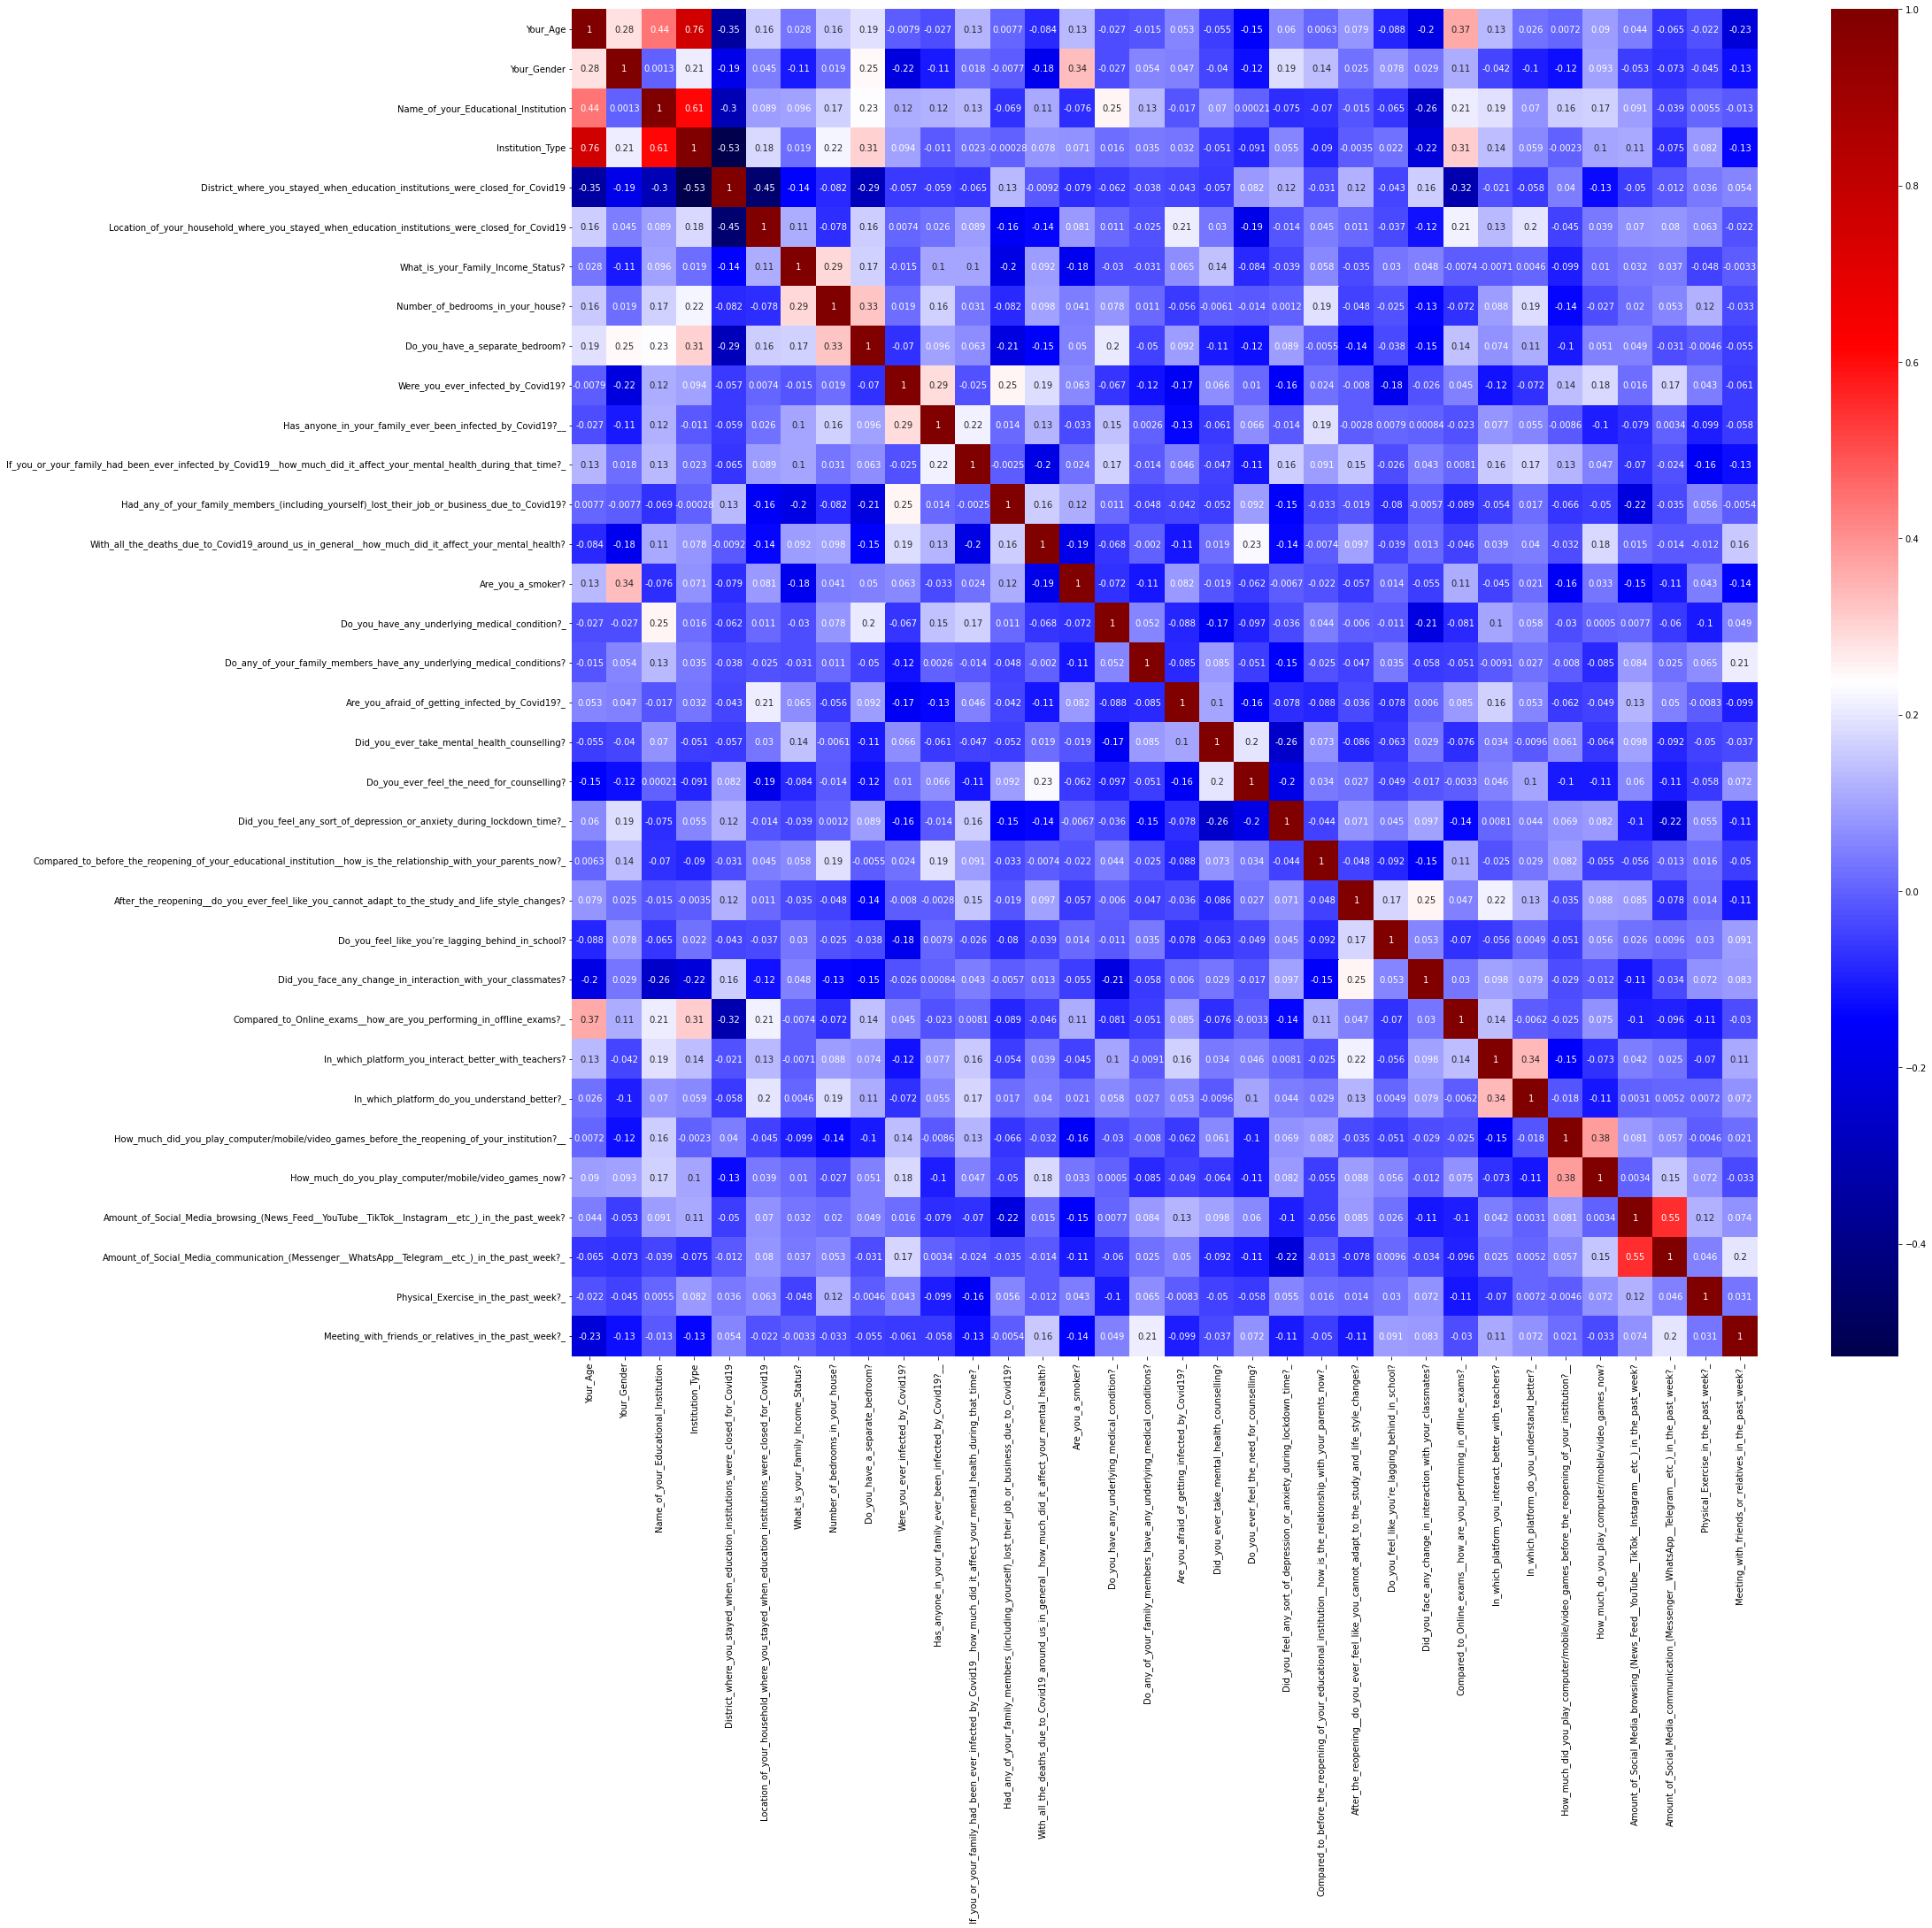

In [ ]:
plt.figure(figsize = (30,28))
sns.heatmap(corr, annot = True, cmap = "seismic");

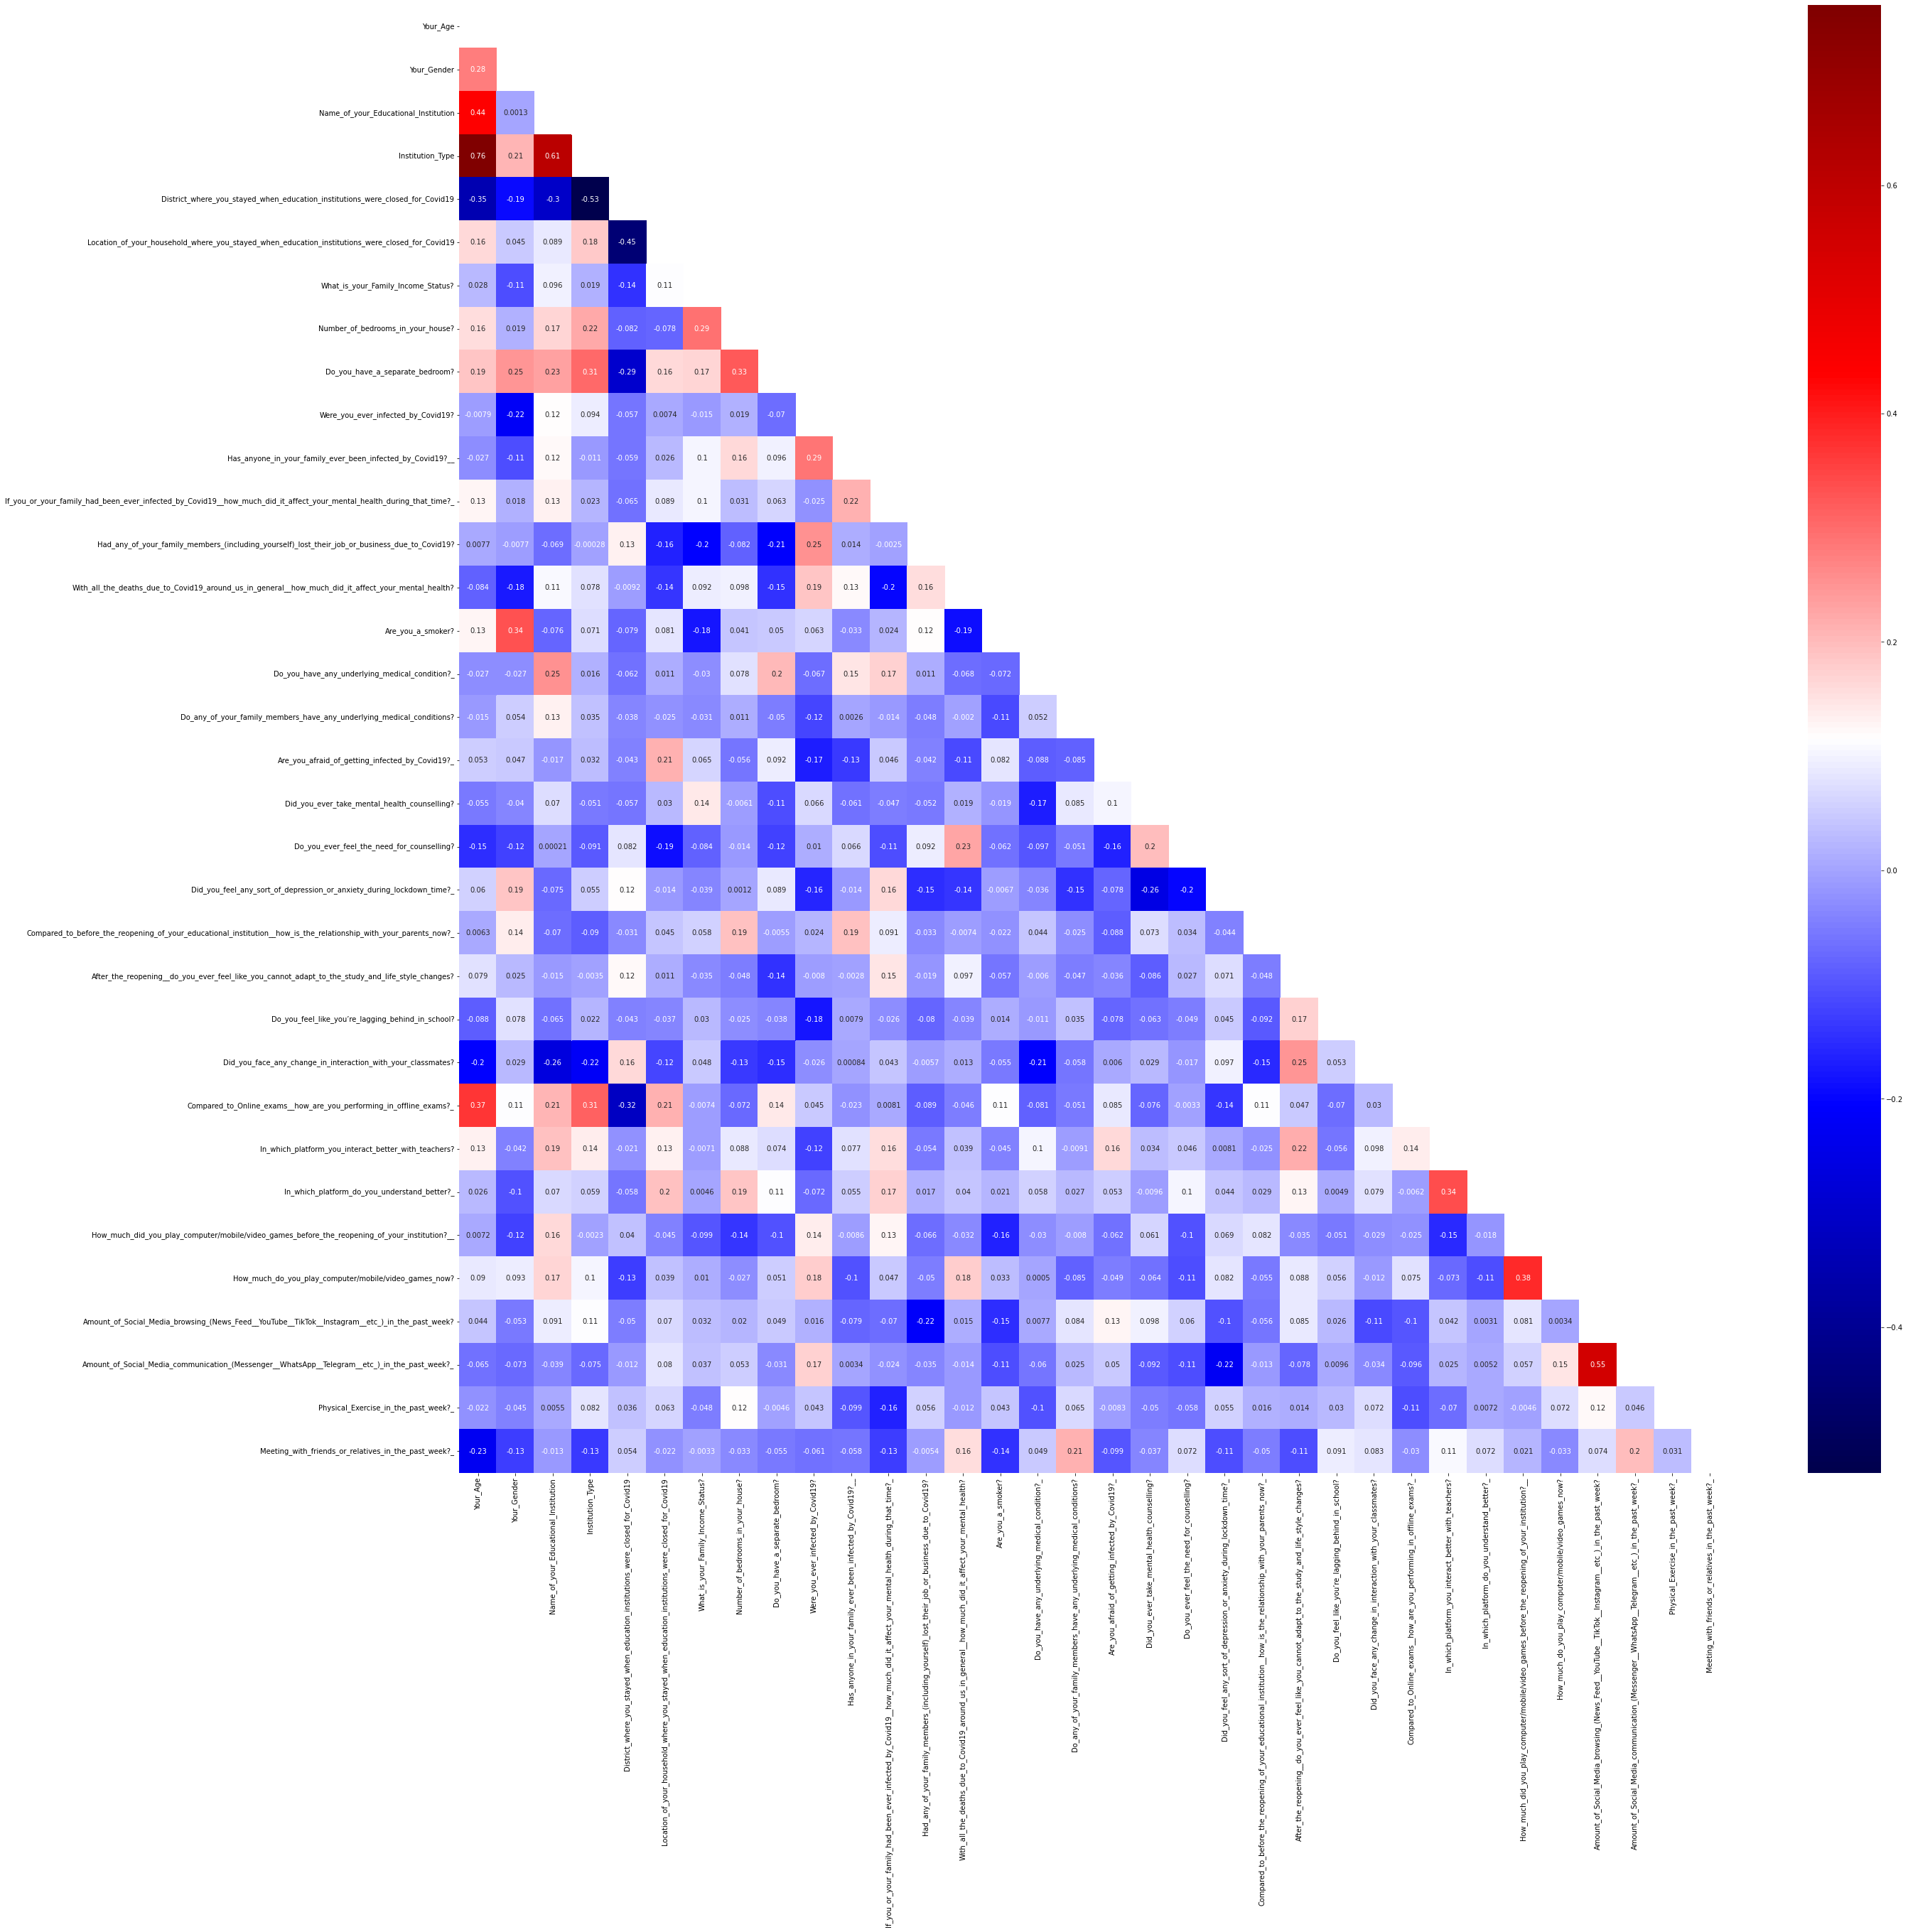

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (40,38))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i, j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_train, 0.7) # already .9, .8, .7 and .6 have chacked
print(len(corr_features))
print(corr_features)

1
{'Institution_Type'}


# Predict Depression

SVM

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.34545454545454546

LGBM

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model1 = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model1.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 1.10888	training's multi_logloss: 1.10888	valid_0's multi_logloss: 1.57526	valid_0's multi_logloss: 1.57526
[40]	training's multi_logloss: 0.819788	training's multi_logloss: 0.819788	valid_0's multi_logloss: 1.66665	valid_0's multi_logloss: 1.66665
[60]	training's multi_logloss: 0.630596	training's multi_logloss: 0.630596	valid_0's multi_logloss: 1.77367	valid_0's multi_logloss: 1.77367
[80]	training's multi_logloss: 0.495541	training's multi_logloss: 0.495541	valid_0's multi_logloss: 1.86612	valid_0's multi_logloss: 1.86612
[100]	training's multi_logloss: 0.390856	training's multi_logloss: 0.390856	valid_0's multi_logloss: 1.96507	valid_0's multi_logloss: 1.96507


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model1.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model1.score(X_test,y_test)))

Training accuracy 0.9922
Testing accuracy 0.2182


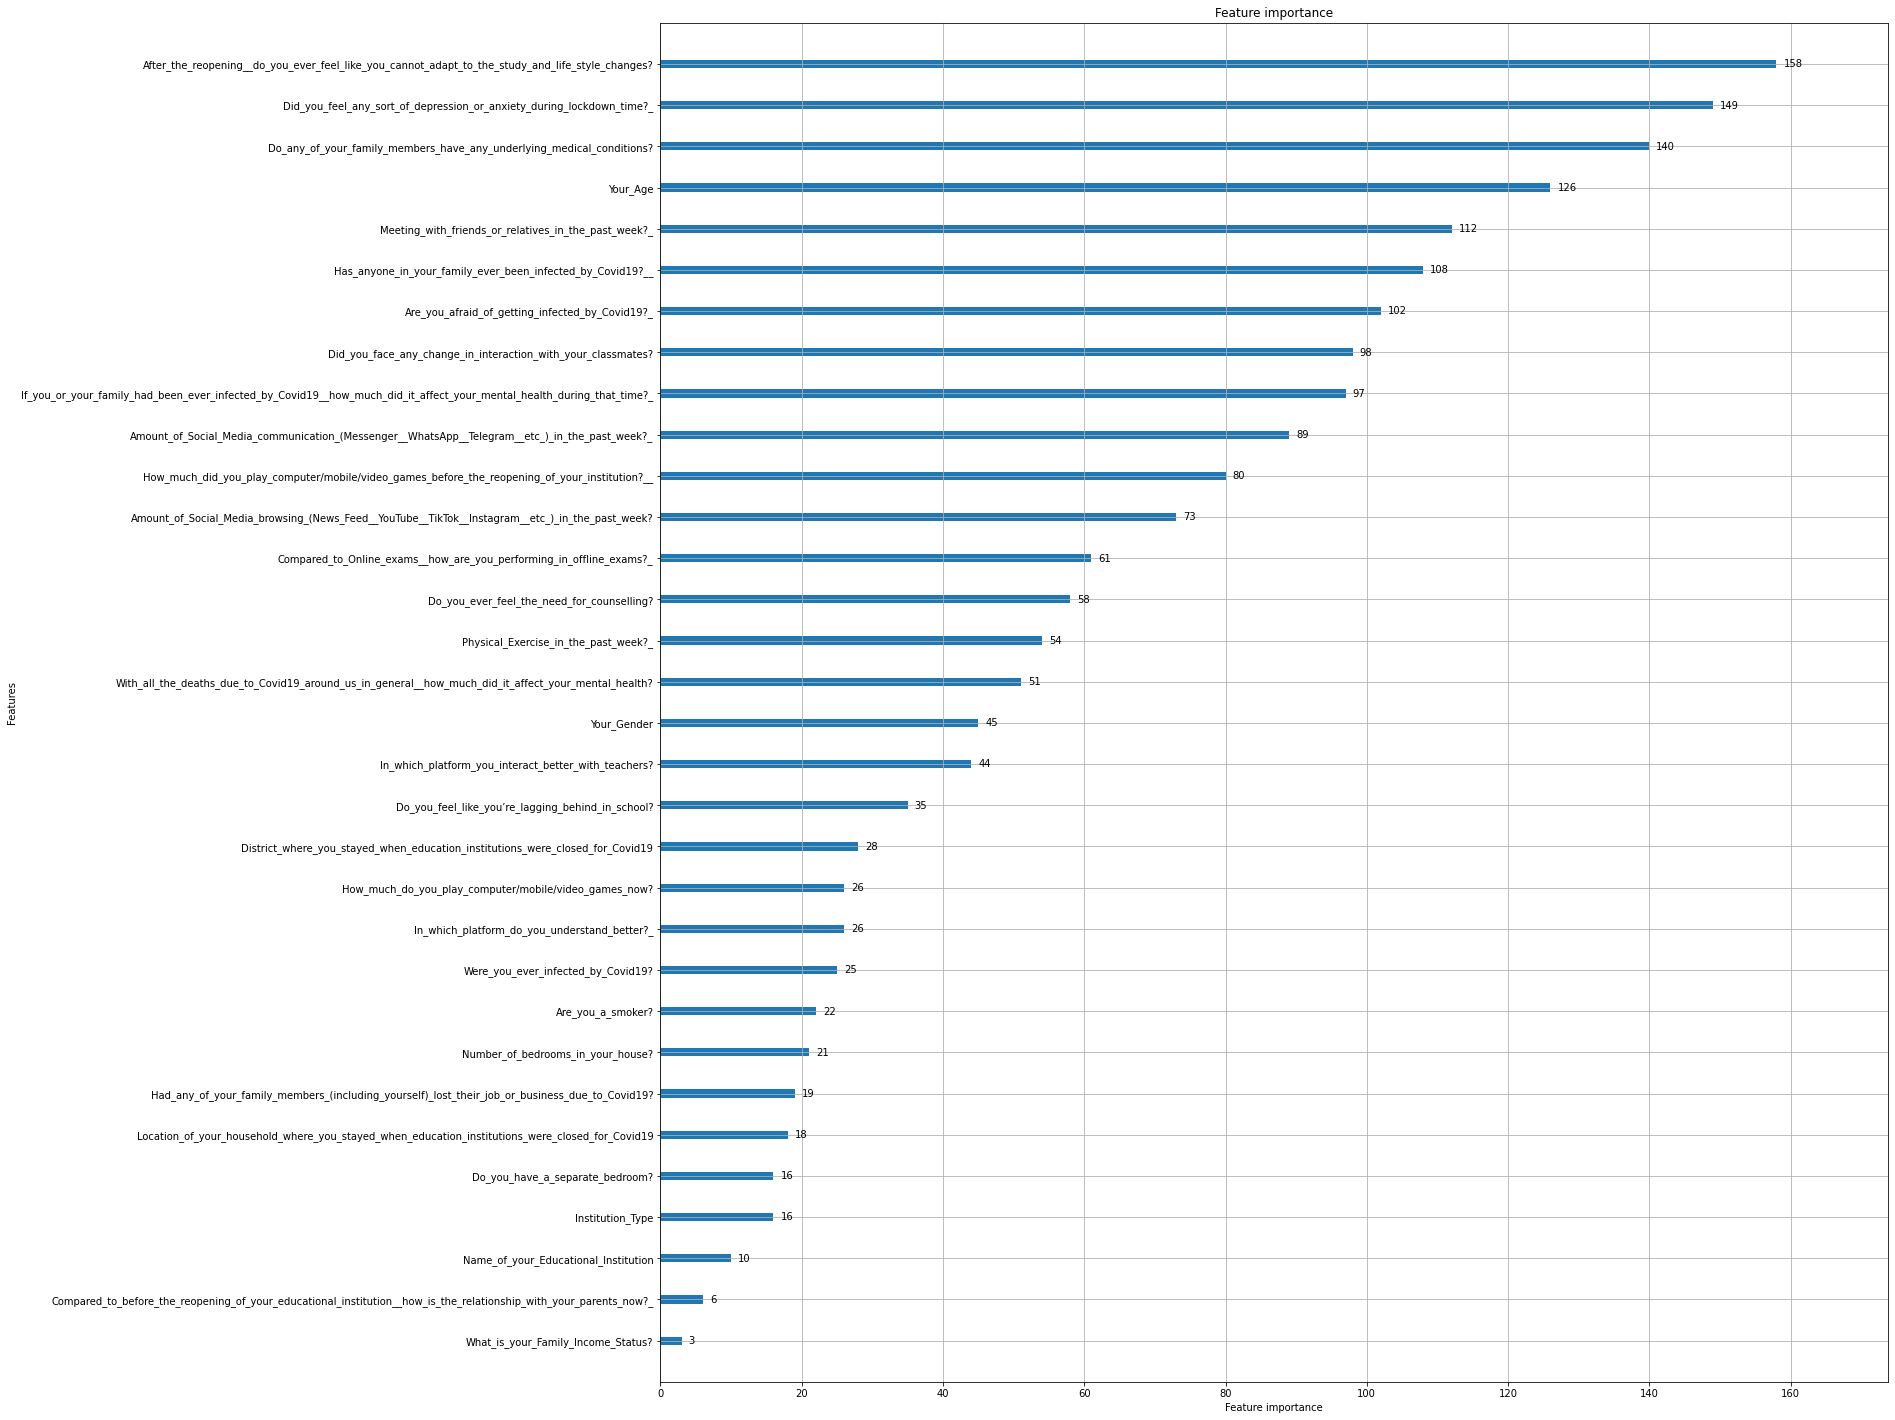

In [ ]:
lightgbm.plot_importance(model1).figure.set_size_inches(22, 25)

KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[9 0 2 4 1]
 [5 1 1 1 0]
 [5 0 2 0 0]
 [3 1 1 2 3]
 [2 0 1 5 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.56      0.45        16
           1       0.50      0.12      0.20         8
           2       0.29      0.29      0.29         7
           3       0.17      0.20      0.18        10
           4       0.60      0.43      0.50        14

    accuracy                           0.36        55
   macro avg       0.39      0.32      0.32        55
weighted avg       0.40      0.36      0.36        55

Accuracy: 0.36363636363636365




```
The metrics are too low as the dataset is small
```

```
So we will generate new synthetic datapoints using GAN
```



# Generate Synthetic Data



```
From this section we will start to generate fake data using GANs
```



First step, we define a generate_latent_points function, it will create random noise in the latent space and be reshaped to the dimensions for matching the input of generator model.

In [ ]:
data = lbl_encode.copy()

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

We define the generate_fake_samples function to produce fake data. The input of the generator will be the created latent points (random noise). The generator will predict the input random noise and output a numpy array. Because it is the fake data, the label will be 0.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    
    return X, y

We will define another function to generate real samples, it will randomly select samples from the real dataset. The label for the real data sample is 1.

In [ ]:
# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = data.sample(n)
    y = np.ones((n, 1))
    return X, y

Sequential Model as Generator.<br>
input_dim = dim of i/p samples <br>
kernel initializer = 'he_uniform' <br>
3 Dense layers in the model <br>
output_dim = dim of dataset (36 columns)

In [ ]:
def define_generator(latent_dim, n_outputs=36):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [ ]:
generator1 = define_generator(10, 36)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 36)                1116      
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


Now we define the Discriminator. <br>
The discriminator is also a simple sequential model including 3 dense layers. The first two layers are activated by ‘relu’ function, the output layer is activated by ‘sigmoid’ function because it will discriminate the input samples are real (True) or fake (False).

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
def define_discriminator(n_inputs=36):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
discriminator1 = define_discriminator(36)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                925       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,276
Trainable params: 2,276
Non-trainable params: 0
_________________________________________________________________


We will define the Gan model after we have define the generator and discriminator models. It is also a sequential model and combine generator with discriminator. NOTE: the discriminator model weight must be not trainable.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss=loss_fn, optimizer='adam')
    return model

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

Train the generator and discriminator. For each epoch, we will combine half batch of real data and half batch of fake data, then calculate the average loss. The combined model will be updated based on train_on_batch function.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)
  g_model.save('trained_generated_model_v1.h5')

In [ ]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

InvalidArgumentError: ignored

# GANs for Tabular Synthetic Data Generation
Code taken from:https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_5_tabular_synthetic.ipynb

In [ ]:
# Installing TabGan

# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2022-09-05 13:57:02--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     184  --.-KB/s    in 0s      

2022-09-05 13:57:02 (8.27 MB/s) - ‘requirements.txt’ saved [184/184]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 1.6 MB/s 
     |████████████████████████████████| 100 kB 8.0 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,16,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,17,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,17,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,17,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


# Loading the Data and Training a Neural Network

In [ ]:
# HIDE OUTPUT
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = lbl_encode.copy()

COLS_USED = df.columns
COLS_TRAIN = df.drop("Anxiety_level", axis=1)

df = df[COLS_USED]

# Split into training and test sets
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df.drop("Anxiety_level", axis=1),
    df["Anxiety_level"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values

# Build the neural network
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

Epoch 1/1000
5/5 - 1s - loss: 1.9232 - val_loss: 1.4399 - 932ms/epoch - 186ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.6060 - val_loss: 1.5067 - 47ms/epoch - 9ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.4855 - val_loss: 1.4609 - 49ms/epoch - 10ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.4321 - val_loss: 1.4760 - 42ms/epoch - 8ms/step
Epoch 5/1000
5/5 - 0s - loss: 1.3743 - val_loss: 1.4668 - 49ms/epoch - 10ms/step
Epoch 6/1000
5/5 - 0s - loss: 1.3318 - val_loss: 1.4300 - 41ms/epoch - 8ms/step
Epoch 7/1000
5/5 - 0s - loss: 1.2452 - val_loss: 1.3936 - 36ms/epoch - 7ms/step
Epoch 8/1000
5/5 - 0s - loss: 1.2278 - val_loss: 1.3193 - 47ms/epoch - 9ms/step
Epoch 9/1000
5/5 - 0s - loss: 1.1930 - val_loss: 1.2565 - 44ms/epoch - 9ms/step
Epoch 10/1000
5/5 - 0s - loss: 1.1289 - val_loss: 1.2501 - 53ms/epoch - 11ms/step
Epoch 11/1000
5/5 - 0s - loss: 1.0684 - val_loss: 1.2495 - 37ms/epoch - 7ms/step
Epoch 12/1000
5/5 - 0s - loss: 1.0657 - val_loss: 1.2148 - 39ms/epoch - 8ms/step
Epoch 13/1000
5/5 - 0s - loss: 

In [ ]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.0688396751669846


In [ ]:
df_x_train

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level
65,21,0,22,2,25,2,2,2,2,1,...,1,2,2,3,2,1,0,3,0,0
67,21,1,22,2,19,3,2,1,2,1,...,2,2,0,1,1,0,1,3,3,3
31,19,0,15,0,21,3,2,1,2,1,...,3,2,2,2,2,0,1,2,3,3
12,18,1,15,0,21,0,1,1,1,1,...,1,2,2,0,0,0,0,2,0,4
41,19,1,17,0,21,3,5,2,2,1,...,1,3,3,3,3,0,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,23,0,22,2,4,3,2,1,1,2,...,3,1,1,3,3,0,2,2,3,4
14,18,0,17,0,21,2,5,2,2,1,...,2,3,3,2,2,0,2,2,3,2
92,22,1,22,2,4,3,2,2,2,1,...,2,0,0,3,3,0,0,2,0,0
179,27,1,22,2,4,3,2,2,2,1,...,0,2,2,1,3,1,1,1,1,4


# Training a GAN



In [ ]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=500, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/36 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

# Evaluating the GAN Results

In [ ]:
gen_x

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level
0,18,0,21,1,9,2,2,2,1,0,...,1,1,0,2,0,3,1,2,2,3
1,22,1,22,0,11,2,4,3,1,0,...,3,1,1,0,0,2,0,3,3,1
2,20,0,22,2,16,2,2,1,1,0,...,0,3,0,2,0,1,2,1,0,3
3,23,1,19,0,3,2,4,1,1,0,...,2,1,1,1,1,1,1,3,3,1
4,21,0,19,2,6,2,1,1,0,0,...,3,1,0,1,0,1,2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,19,0,22,2,4,3,2,2,2,2,...,2,2,2,0,1,0,0,2,0,3
1896,22,1,22,2,4,3,2,1,2,1,...,2,3,3,3,3,0,1,1,0,0
1897,19,1,9,0,4,3,2,2,2,2,...,3,2,2,0,3,0,0,2,0,2
1898,23,0,22,2,14,3,2,2,2,2,...,0,2,2,3,2,0,0,2,0,0


In [ ]:
gen_y

0       1
1       2
2       1
3       1
4       0
       ..
1895    3
1896    3
1897    1
1898    0
1899    3
Name: Anxiety_level, Length: 1900, dtype: int64

In [ ]:
gen_x.shape

(1900, 35)

In [ ]:
# Predict
pred = model.predict(gen_x.values)
score = np.sqrt(metrics.mean_squared_error(pred,gen_y.values))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.395049518447323


In [ ]:
df_augmented = gen_x.assign(Anxiety_level = gen_y)

In [ ]:
df_augmented.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,18,0,21,1,9,2,2,2,1,0,...,1,0,2,0,3,1,2,2,3,1
1,22,1,22,0,11,2,4,3,1,0,...,1,1,0,0,2,0,3,3,1,2
2,20,0,22,2,16,2,2,1,1,0,...,3,0,2,0,1,2,1,0,3,1
3,23,1,19,0,3,2,4,1,1,0,...,1,1,1,1,1,1,3,3,1,1
4,21,0,19,2,6,2,1,1,0,0,...,1,0,1,0,1,2,2,1,3,0


In [ ]:
df_augmented.shape

(1900, 36)

# Now running ML Algorithms on Augmented Synthetic Data

In [ ]:
df_depression = df_augmented.drop(columns = 'Anxiety_level')
y = df_depression['depression_level']
X = df_depression.drop(columns = 'depression_level')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [ ]:
X_train.shape

(1330, 34)

In [ ]:
corr = X_train.corr()
corr

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
Your_Age,1.000000,0.025625,0.069399,0.011601,-0.045763,0.029489,-0.000417,0.017158,0.027361,0.030340,...,-0.019116,0.008883,0.017244,0.007917,0.029130,0.017304,0.041242,-0.044751,-0.031991,0.043085
Your_Gender,0.025625,1.000000,-0.057836,-0.009119,0.004408,-0.003884,0.016058,-0.018762,0.120534,0.025647,...,0.033890,0.046878,0.051199,0.076786,0.020430,0.056773,-0.064524,0.029245,-0.060647,0.012985
Name_of_your_Educational_Institution,0.069399,-0.057836,1.000000,0.046944,-0.022920,0.023311,-0.048019,-0.019408,0.009923,-0.016132,...,-0.014382,0.035739,-0.017433,0.007332,0.026992,-0.034770,-0.014645,0.067376,0.012243,0.007639
Institution_Type,0.011601,-0.009119,0.046944,1.000000,-0.027120,0.016019,0.006378,0.035523,0.045680,0.004754,...,0.031759,0.046365,0.046248,0.003515,0.034280,0.052681,-0.049015,-0.013497,-0.053005,-0.066372
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,-0.045763,0.004408,-0.022920,-0.027120,1.000000,-0.027535,-0.006605,0.008932,-0.014682,-0.011962,...,0.031192,-0.040042,-0.059615,0.013212,0.002209,0.008895,0.004004,0.024172,0.002264,-0.007252
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,0.029489,-0.003884,0.023311,0.016019,-0.027535,1.000000,0.029232,-0.007572,0.048955,0.066901,...,-0.002120,-0.061386,0.062681,0.059701,0.037793,-0.008024,-0.013661,-0.052620,0.021837,0.066053
What_is_your_Family_Income_Status?,-0.000417,0.016058,-0.048019,0.006378,-0.006605,0.029232,1.000000,0.055754,0.003308,0.043031,...,-0.008065,0.025572,0.056676,-0.019587,-0.015798,0.036727,0.038776,0.022123,-0.026551,0.054888
Number_of_bedrooms_in_your_house?,0.017158,-0.018762,-0.019408,0.035523,0.008932,-0.007572,0.055754,1.000000,0.052570,0.085692,...,0.007503,0.017681,0.018382,-0.025805,0.044647,0.075480,-0.009727,0.057371,0.033517,0.007689
Do_you_have_a_separate_bedroom?,0.027361,0.120534,0.009923,0.045680,-0.014682,0.048955,0.003308,0.052570,1.000000,0.079724,...,0.041455,0.042020,0.100080,0.031237,0.086235,0.035547,-0.007560,0.012239,0.005390,-0.019922
Were_you_ever_infected_by_Covid19?,0.030340,0.025647,-0.016132,0.004754,-0.011962,0.066901,0.043031,0.085692,0.079724,1.000000,...,0.013107,0.020907,0.104879,0.019462,0.062889,0.038217,0.004994,-0.049598,0.056998,0.035147


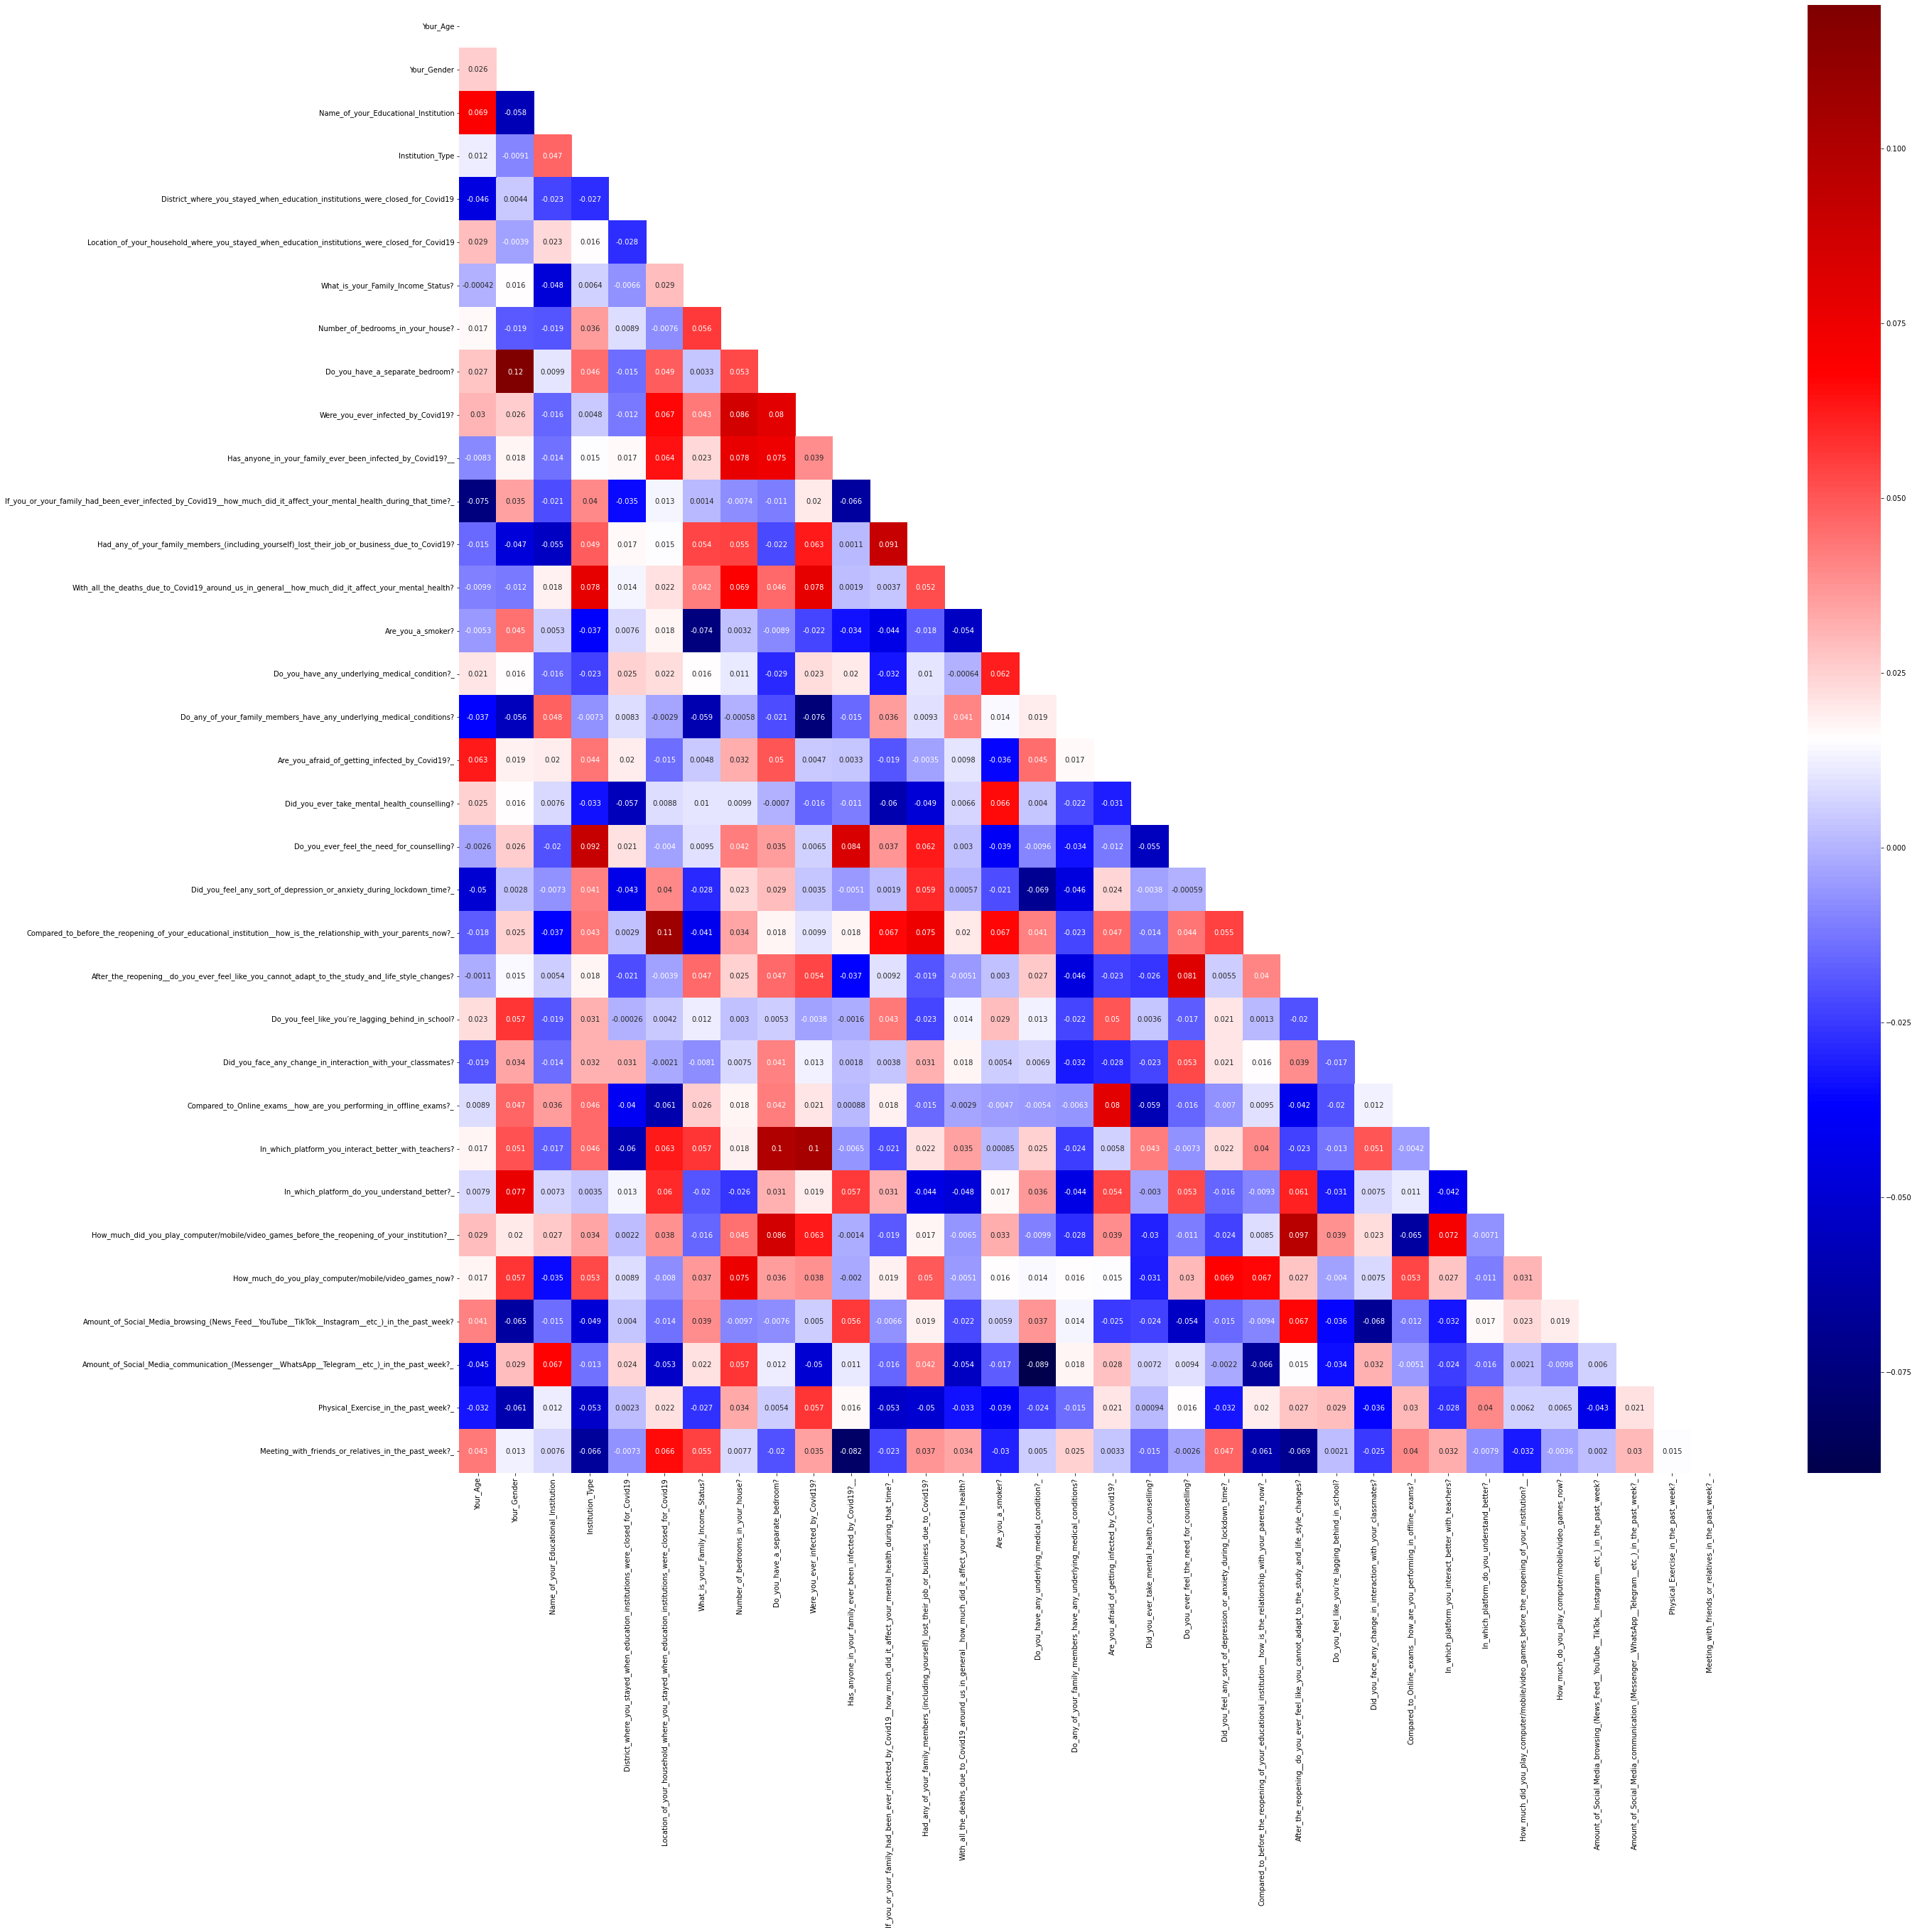

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (40,38))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i, j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7) # already .9, .8, .7 and .6 have chacked
print(len(corr_features))
print(corr_features)

0
set()


SVM

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.18070175438596492

LGBM

In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 1.11998	training's multi_logloss: 1.11998	valid_0's multi_logloss: 1.62216	valid_0's multi_logloss: 1.62216
[40]	training's multi_logloss: 0.81119	training's multi_logloss: 0.81119	valid_0's multi_logloss: 1.65733	valid_0's multi_logloss: 1.65733
[60]	training's multi_logloss: 0.601453	training's multi_logloss: 0.601453	valid_0's multi_logloss: 1.69477	valid_0's multi_logloss: 1.69477
[80]	training's multi_logloss: 0.449017	training's multi_logloss: 0.449017	valid_0's multi_logloss: 1.73546	valid_0's multi_logloss: 1.73546
[100]	training's multi_logloss: 0.335638	training's multi_logloss: 0.335638	valid_0's multi_logloss: 1.77068	valid_0's multi_logloss: 1.77068


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.2053
